In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import time
import numpy as np

# https://www.youtube.com/watch?v=ltXSoduiVwY&list=PLcWfeUsAys2k_xub3mHks85sBHZvg24Jd&index=3

## Linear Regression

In [21]:

# Load the data
file_path = r"C:\Users\Omer\Downloads\price-prediction.xlsx"
data = pd.read_excel(file_path)
# data
# Assuming the data has columns 'x' and 'y'
x = data['PLOTS']
y = data['PRICE']
points = list(zip(x, y))


# Normalize the data
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)
points = list(zip(x, y))

In [3]:

def plot_data(m, b, data):
    x, y = zip(*data)
    plt.scatter(x, y)
    plt.plot(x, [m * xi + b for xi in x], color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Data with Fitted Line')
    plt.show()


In [4]:
def loss_function(m, b, points):
    total_error = 0
    for x, y in points:
        total_error += (y - (m * x + b)) ** 2
    return total_error / len(points)


In [5]:
def gradient_descent(current_m, current_b, points, lr):
    m_gradient = 0
    b_gradient = 0
    N = len(points)
    
    for x, y in points:
        m_gradient += -(2/N) * x * (y - (current_m * x + current_b))
        b_gradient += -(2/N) * (y - (current_m * x + current_b))
    
    new_m = current_m - (lr * m_gradient)
    new_b = current_b - (lr * b_gradient)
    
    return new_m, new_b


Epoch 9900: m = 0.9931397735594968, b = -4.995854202671723e-16, Loss = 0.013673385315269184


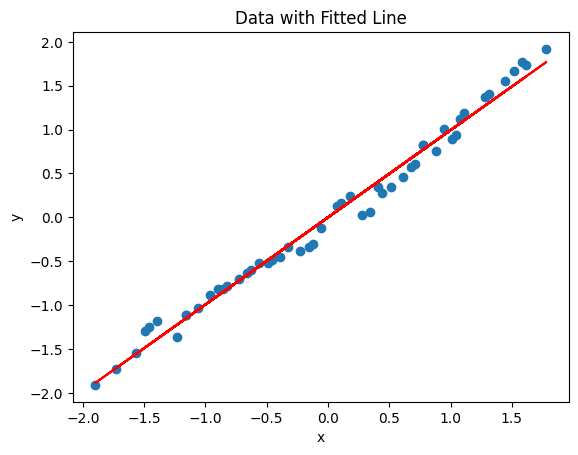

Final values: m = 0.9931397739993137, b = -4.996357272479756e-16


In [23]:
m, b = 0, 0
lr = 0.001
epochs = 10000

# Perform gradient descent and plot the prediction line after each iteration
for epoch in range(epochs):
    m, b = gradient_descent(m, b, points, lr)
    if epoch % 100 == 0:  # Plot every 10 epochs for better visualization
        display.clear_output(wait=True)
        print(f'Epoch {epoch}: m = {m}, b = {b}, Loss = {loss_function(m, b, points)}')
        plot_data(m, b, points)
        time.sleep(1)

# Print final values
print(f'Final values: m = {m}, b = {b}')

In [25]:
class LinearRegression:

    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [ ]:
data = pd.read_excel(file_path)
# data
# Assuming the data has columns 'x' and 'y'
x = data['PLOTS']
y = data['PRICE']
points = list(zip(x, y))


# Normalize the data
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)
points = list(zip(x, y))

In [2]:
import numpy as np
import joblib  # Use joblib to load the model

# Sigmoid Function
def sigmoid(linearEq):
    return 1 / (1 + np.exp(-linearEq))

# Log-Odds Function
def log_odds(prob):
    return np.log(prob / (1 - prob))

# Load the logistic regression model
model = joblib.load('logistic_model.pkl')

# Example feature matrix X (e.g., two features for simplicity)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])

# Predict probabilities using the model
probabilities = model.predict_proba(X)[:, 1]
print(f'Predicted Probabilities (Model): {probabilities}')

# Predict probabilities using sigmoid form
coefficients = model.coef_[0]
intercept = model.intercept_[0]
linear_eq = np.dot(X, coefficients) + intercept
probabilities_sigmoid = sigmoid(linear_eq)
print(f'Predicted Probabilities (Sigmoid): {probabilities_sigmoid}')

# Log-odds form
log_odds_values = log_odds(probabilities_sigmoid)
print(f'Log-Odds: {log_odds_values}')

Intercept: -4.0864416449013, Coefficients: [0.68066694 0.68127673]
Predicted Probabilities (Sigmoid): [0.11473913 0.33597622 0.66388734 0.88519874]
Log-Odds: [-2.04322126 -0.68127759  0.68066607  2.04260973]
